<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Section 2, Part a: Regression Intro: Transforming Target


## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for Regression
* Apply inverse transformations to be able to use these in a Regression context


In [3]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install scikit-learn

Explanation
def warn(*args, **kwargs): pass: This defines a function called warn that accepts any arguments (*args for positional arguments and **kwargs for keyword arguments) but does nothing (pass means “do nothing”).
warnings.warn = warn: This line assigns the custom warn function to warnings.warn. So, every time warnings.warn is called, it actually runs the empty warn function defined above, which does nothing.
Why Use This?
This code effectively suppresses all warnings in the script. By overriding warnings.warn, you prevent any warnings from being printed, which might be helpful when you want a clean output without warning messages (e.g., when you're testing or debugging and already aware of potential issues).

However, be careful with this, as it can hide useful warnings that might indicate important issues in your code!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# Surpress warnings:
'''
def warnfun(*args, **kwargs):
    pass
import warnings
warnings.warn= warnfun
'''

'\ndef warnfun(*args, **kwargs):\n    pass\nimport warnings\nwarnings.warn= warnfun\n'

In the following cells we will load the data and define some useful plotting functions.


In [28]:
np.random.seed(72018)

def to_2d(array):
    return array.reshape(array.shape[0], -1)

def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data

def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data


In [29]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"

--2024-11-12 16:49:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60056 (59K) [binary/octet-stream]
Saving to: ‘boston_housing_clean.pickle’

boston_housing_clea 100%[===================>]  58.65K  --.-KB/s    in 0.1s    

2024-11-12 16:49:20 (570 KB/s) - ‘boston_housing_clean.pickle’ saved [60056/60056]



### Loading the Boston Housing Data


In [46]:

with open('boston_housing_clean.pickle', 'rb') as to_read:
    boston = pd.read_pickle(to_read)
    #print(type(boston)) # will be return the class of boston.
    #print(len(boston)) #return the length of the dictionary.
    #print(boston.keys()) # method will return a list of all the keys in the dictionary.
    #print(boston.items()) # method will return a list of all the values in the dictionary.
    #print(boston.values()) # method will return each item in a dictionary, as tuples in a list.

boston_data = boston['dataframe'] #dataframe
boston_description = boston['description'] # string
print('Type boston_data is :',type(boston_data))
print('Type boston_description is :',type(boston_description))

Type boston_data is : <class 'pandas.core.frame.DataFrame'>
Type boston_description is : <class 'str'>


In [48]:
description_boston={'CRIM':'per capita crime rate by town',
                    'ZN':'proportion of residential land zoned for lots over 25,000 sq.ft.',
                    'INDUS':'proportion of non-retail business acres per town',
                   'CHAS':'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
                    'NOX':'nitric oxides concentration (parts per 10 million)',
                    'RM':'average number of rooms per dwelling',
                    'AGE':'proportion of owner-occupied units built prior to 1940',
                    'DIS':'weighted distances to five Boston employment centres',
                    'RAD':'index of accessibility to radial highways',
                    'TAX':'full-value property-tax rate per $10,000',
                    'PTRATIO':'pupil-teacher ratio by town',
                    'B':'1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
                    'LSTAT':'lower status of the population',
                    'MEDV':'Median value of owner-occupied homes in $1000s'}
print(type(description_boston))

<class 'dict'>


In [114]:
len(description_boston)

14

In [50]:
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


**Determining** **Normality**


Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Using a Visual approach
* Using a Statistical Test


#### Using a Visual approach


#### Plotting a histogram:


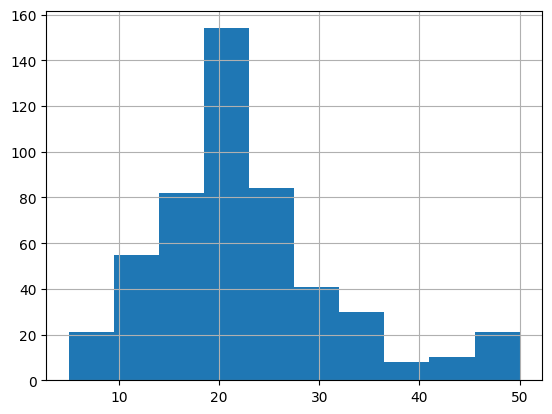

In [51]:
boston_data.MEDV.hist();



```
# This is formatted as code
```

The histogram does not look normal due to its right tail.


#### Using a Statistical Test


Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say:
    * This test outputs a **p-value**. The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


In [52]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [54]:
normaltest(boston_data.MEDV.values) # pvalue=1.7583188871696095e-20 that meaning =0.000000000000000000017583188871696095

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

# p-value is _extremely_ low. Our **y** variable which we have been dealing with this whole time was not normally distributed!


### Apply transformations to make target variable more normally distributed for Regression


Linear Regression assumes a normally distributed residuals which can be aided by transforming **y** variable which is the target variable. Let's try some common transformations to try and get **y** to be normally distributed:

* Log Transformation
* Square root Transformation
* Box cox Transformation


### Log Transformation


The log transformation can transform data that is significantly skewed right to be more normally distributed:


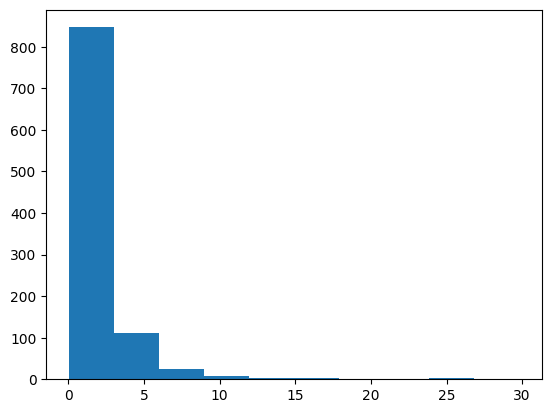

In [59]:
data = plot_exponential_data()

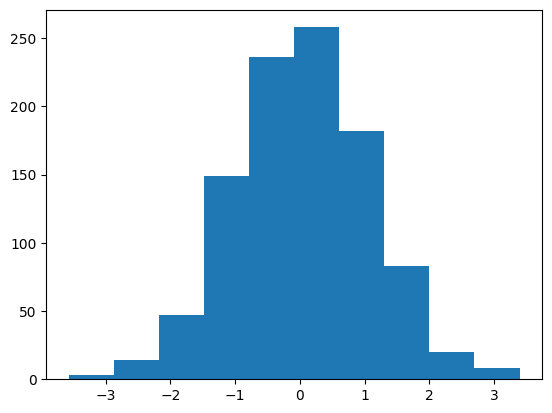

In [60]:
plt.hist(np.log(data));

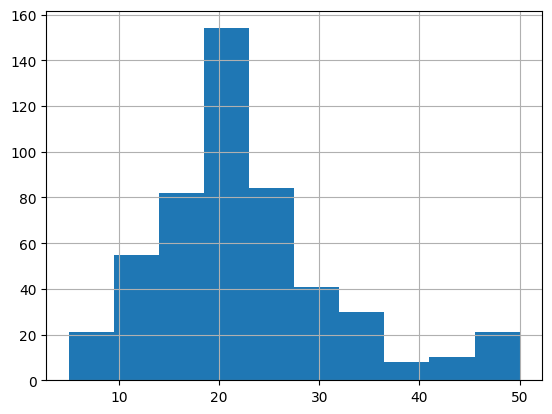

In [61]:
boston_data.MEDV.hist();

**Apply transformation to Boston Housing data:**


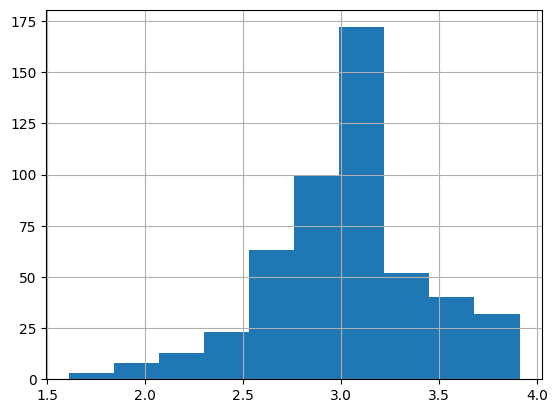

In [63]:
log_medv = np.log(boston_data.MEDV)
log_medv.hist();

In [65]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

**Conclusion**: The output is closer to normal distribution, but still not completely normal.


### Square root Transformation

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:


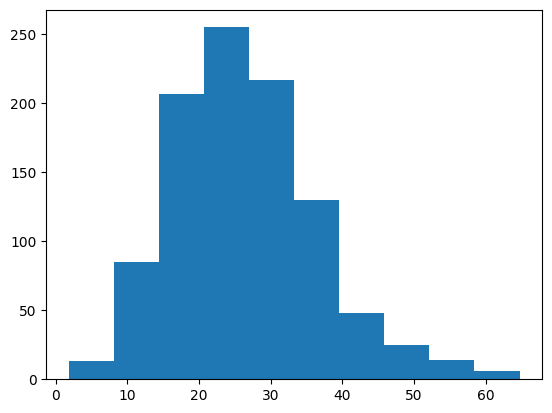

In [71]:
data = plot_square_normal_data()

You may notice that the output still exhibits a slight right skew.


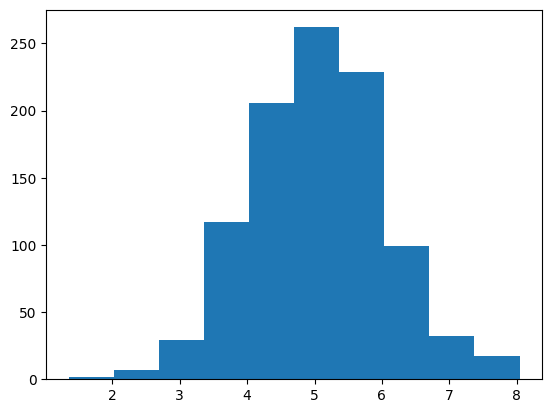

In [72]:
plt.hist(np.sqrt(data));

#### Exercise


Apply the square root transformation to the Boston Housing data target and test whether the result is normally distributed.


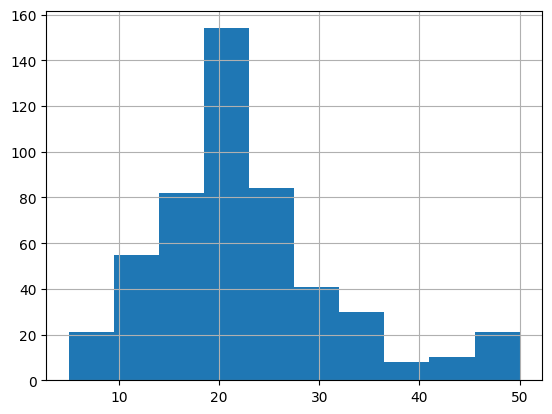

In [75]:
boston_data.MEDV.hist();

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

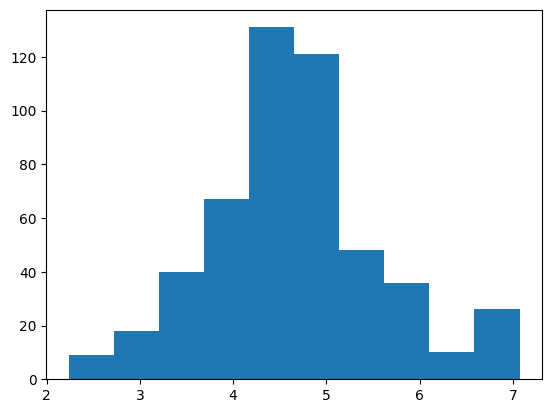

In [74]:
## Enter your code here
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

<details><summary>Click here for a sample python solution</summary>

```python
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

```


In [76]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

### Box cox Transformation


The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [77]:
from scipy.stats import boxcox

In [78]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [79]:
lam

0.21662090066621686

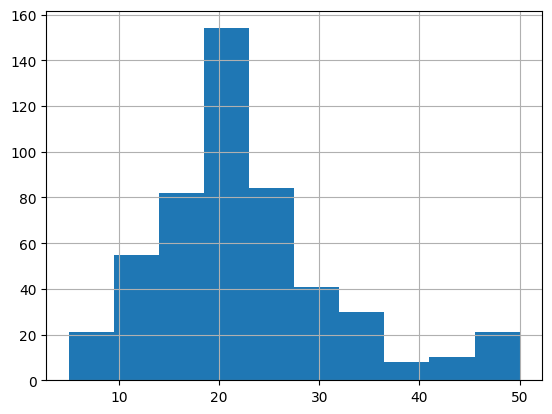

In [80]:
boston_data['MEDV'].hist();

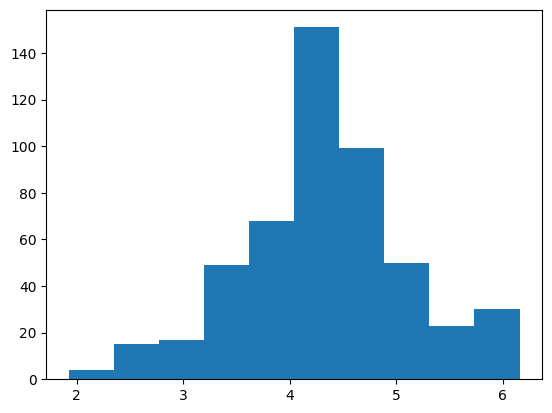

In [81]:
plt.hist(boxcox_medv);

In [82]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528777459214, pvalue=0.10468866918093613)

We find that the box cox results in a graph which is significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.

Now that we have a normally distributed y-variable, let's test Regression using this transformed target variables.


### Testing regression:


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,
                                   PolynomialFeatures)

In [85]:
lr = LinearRegression()

**Define and load the predictor (X) and Target(y) variables**


In [88]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1) #Independent Variables
y = boston_data[y_col] #Dependent Variables
# here we drop the boston_data['MEDV'] to sperte data to two type: feter and leabel

In [112]:
X

506

In [113]:
len(y)

506

so I have 506 row and 14 column

**Create Polynomial Features**


In [98]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [109]:
#X_pf
type(X_pf) #numpy.ndarray
X_pf.shape
# where the first dimension has 506 elements and the second has 104.


array([[2.73100000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.57529610e+05, 3.62766600e+03, 8.35396000e+01],
       [2.72900000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.54315409e+05, 1.58310490e+03, 1.62409000e+01],
       [3.23700000e-02, 0.00000000e+00, 2.18000000e+00, ...,
        1.55732837e+05, 1.16021220e+03, 8.64360000e+00],
       ...,
       [6.07600000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 2.23851600e+03, 3.18096000e+01],
       [1.09590000e-01, 0.00000000e+00, 1.19300000e+01, ...,
        1.54802902e+05, 2.54955600e+03, 4.19904000e+01],
       [4.74100000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 3.12757200e+03, 6.20944000e+01]])

**Split the data into Training and Test Sets**   

The split ratio here is 0.7 and 0.3 which means we will assign **70%** data for training and **30%** data for testing


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3,
                                                    random_state=72018)

In [115]:
X_train

array([[3.47428000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.25705703e+05, 1.87556950e+03, 2.79841000e+01],
       [3.70500000e-02, 2.00000000e+01, 3.33000000e+00, ...,
        1.53844373e+05, 1.80033570e+03, 2.10681000e+01],
       [1.23290000e-01, 0.00000000e+00, 1.00100000e+01, ...,
        1.55985503e+05, 6.40213950e+03, 2.62764100e+02],
       ...,
       [1.41500000e-01, 0.00000000e+00, 6.91000000e+00, ...,
        1.46972557e+05, 2.22737970e+03, 3.37561000e+01],
       [2.24890000e-01, 1.25000000e+01, 7.87000000e+00, ...,
        1.54071950e+05, 8.02703400e+03, 4.18202500e+02],
       [3.22640000e-01, 0.00000000e+00, 2.18900000e+01, ...,
        1.43073062e+05, 6.39242500e+03, 2.85610000e+02]])

In [116]:
X_test

array([[4.52700000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.57529610e+05, 3.60385200e+03, 8.24464000e+01],
       [2.59150000e-01, 0.00000000e+00, 2.18900000e+01, ...,
        1.53750252e+05, 6.74037090e+03, 2.95496100e+02],
       [6.96215000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.55575025e+05, 6.74869730e+03, 2.92752100e+02],
       ...,
       [4.98100000e-02, 2.10000000e+01, 5.64000000e+00, ...,
        1.57529610e+05, 3.34586700e+03, 7.10649000e+01],
       [3.65900000e-02, 2.50000000e+01, 4.86000000e+00, ...,
        1.57529610e+05, 2.66716800e+03, 4.51584000e+01],
       [9.82349000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        1.57529610e+05, 8.43015600e+03, 4.51137600e+02]])

**Normalize the training data using `StandardScaler` on `X_train`. Use fit_transform() function**


In [117]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.


In [118]:
# Enter your code here
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

<details><summary>Click here for a sample python solution</summary>

```python
    
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

```


As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data


In [119]:
y_train_bc.shape

(354,)

In [120]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

In [121]:
y_test

,MEDV
502,20.6
127,16.2
390,15.1
303,33.1
277,33.1
...,...
433,14.3
505,11.9
53,23.4
82,24.8


In [122]:
y_pred_bc

array([4.43923406, 4.16090916, 4.15308645, 5.72559258, 5.7030062 ,
       6.59889483, 4.18331988, 4.77591002, 4.6861456 , 4.85728933,
       6.83944518, 3.76006122, 5.06792504, 4.36602086, 6.91067203,
       4.94872338, 4.64047962, 5.83610091, 5.25013595, 5.44752193,
       3.97745085, 4.88502879, 4.20357865, 3.61242511, 5.2349776 ,
       5.30389186, 5.86527563, 4.79984545, 4.79631505, 6.80365099,
       3.3671651 , 4.39738299, 4.29845386, 6.96423301, 4.49871222,
       5.52039157, 4.80019654, 5.61272392, 3.05186385, 5.34227339,
       3.3408162 , 3.97104141, 5.13918229, 4.37998316, 5.06134108,
       6.28670332, 4.90206064, 5.25595624, 5.69828189, 4.21011227,
       5.23206173, 5.48921756, 4.37075199, 3.94811685, 4.15121051,
       2.74849185, 4.06553457, 3.13202407, 4.55300077, 4.80245912,
       5.74892315, 3.26185922, 3.53812191, 6.17778698, 4.23622515,
       5.82374056, 3.41359673, 3.8397817 , 4.96307804, 5.7430395 ,
       5.20656198, 5.22395313, 5.25945043, 5.43875996, 3.83969

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?


#### Apply inverse transformations to be able to use these in a Regression context


Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:


In [123]:
from scipy.special import inv_boxcox

In [124]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [125]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!


### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Use the **inv_boxcox()** function to get the transformed predicted values


In [126]:
#Enter your code here
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_test,y_pred_tran)

0.8884878245852517

<details><summary>Click here for a sample python solution</summary>

```python
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_test,y_pred_tran)

```


## Practice Exercise:

### Determine the R^2 of a LinearRegression without the box cox transformation.


In [127]:
# Enter your code here
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)


0.8689110469231023